In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
import csv
import os
import wget
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import f1_score

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
news = pd.read_csv('./csv/news_lenta_ru.csv', engine='python', on_bad_lines='skip')

In [3]:
news

,url,title,text,topic,tags
0,https://lenta.ru/news/1914/09/16/hungarnn/,1914. Русские войска вступили в пределы Венгрии,Бои у Сопоцкина и Друскеник закончились отступ...,Библиотека,Первая мировая
1,https://lenta.ru/news/1914/09/16/lermontov/,1914. Празднование столетия М.Ю. Лермонтова от...,"Министерство народного просвещения, в виду про...",Библиотека,Первая мировая
2,https://lenta.ru/news/1914/09/17/nesteroff/,1914. Das ist Nesteroff!,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Библиотека,Первая мировая
3,https://lenta.ru/news/1914/09/17/bulldogn/,1914. Бульдог-гонец под Льежем,Фотограф-корреспондент Daily Mirror рассказыва...,Библиотека,Первая мировая
4,https://lenta.ru/news/1914/09/18/zver/,1914. Под Люблином пойман швабский зверь,"Лица, приехавшие в Варшаву из Люблина, передаю...",Библиотека,Первая мировая
...,...,...,...,...,...
9995,https://lenta.ru/news/2000/07/10/kpp/,На границе Дагестана и Чечни будут стрелять в ...,Глава МВД Дагестана приказал нарядам милиции н...,Россия,Все
9996,https://lenta.ru/news/2000/07/10/gossovet/,Путин пересадит губернаторов в Госсовет,Представители Кремля ведут активный диалог с г...,Россия,Все
9997,https://lenta.ru/news/2000/07/10/clowns/,В Москву съедутся клоуны со всего мира,"В Москве 20 июля открывается фестиваль ""Планет...",Россия,Все
9998,https://lenta.ru/news/2000/07/10/women/,Старшая Уильямс выигрывает чемпионский титул,Чисто американским получился финал Уимблдонск...,Спорт,Все


In [4]:
url = 'https://raw.githubusercontent.com/dkulagin/kartaslov/master/dataset/kartaslovsent/kartaslovsent.csv'
path = './csv/kartaslovsent.csv'
if not os.path.isfile("./csv/kartaslovsent.csv"):
    wget.download(url, out=path)

In [5]:
df_tone_dictionary = pd.read_csv('./csv/kartaslovsent.csv', sep=';', on_bad_lines='skip')

In [6]:
df_tone_dictionary

,term,tag,value,pstv,ngtv,neut,dunno,pstvNgtvDisagreementRatio
0,абажур,NEUT,0.08,0.185,0.037,0.580,0.198,0.00
1,аббатство,NEUT,0.10,0.192,0.038,0.578,0.192,0.00
2,аббревиатура,NEUT,0.08,0.196,0.000,0.630,0.174,0.00
3,абзац,NEUT,0.00,0.137,0.000,0.706,0.157,0.00
4,абиссинец,NEUT,0.28,0.151,0.113,0.245,0.491,0.19
...,...,...,...,...,...,...,...,...
46122,ёмкость,NEUT,0.00,0.167,0.000,0.690,0.143,0.00
46123,ёрзать,NGTV,-0.54,0.050,0.446,0.397,0.107,0.00
46124,ёрничать,NGTV,-0.79,0.078,0.529,0.236,0.157,0.00
46125,ёрш,NEUT,0.16,0.224,0.072,0.576,0.128,0.00


In [7]:
title_news_1, title_news_2 = train_test_split(news['title'], train_size=5, random_state=42)

In [8]:
df_title_news_1 = pd.DataFrame(title_news_1)
df_title_news_2 = pd.DataFrame(title_news_2)

In [9]:
df_title_news_1.head()

,title
5734,Ястржембский называет имя арестованного за взр...
5191,"Чемпионат Италии: ""Ювентус"" ушел в отрыв"
5390,Из Чернокозово отпущены первые амнистированные...
860,Парламент Украины затребовал у Конгресса США п...
7270,Пилот Формулы-1 уцелел в авиакатастрофе


In [10]:
df_title_news_2.head()

,title
6252,"Чтобы не платить налог, интернет-изданиям нужн..."
4684,Кубинского дипломата выставили из США
1731,Правительство РФ: третье тысячеление наступит ...
4742,Взрывчатку в Сибирь отправили по почте
4521,В Дагестане совершено покушение на генерала по...


In [11]:
def get_sentiment(text, df_td=df_tone_dictionary):
    words = nltk.word_tokenize(text.lower())
    sum_value = 0
    
    for word in words:
        if len(df_td[df_td.term == word]):
            df_filtered = df_td[df_td['term'] == word]
            value = df_filtered['value'].iloc[0]
            sum_value += value
 
    return sum_value   


In [12]:
def get_sentiment_label(score):
    if score < -0.35:
        return 'negative'  
    elif score >= 0.55:
        return 'positive' 
    else:
        return 'neutral'

#### Проверка функций

In [13]:
%%time
get_sentiment('Жаль, что Аист прилетел')

CPU times: total: 0 ns
Wall time: 23.4 ms


0.55

In [14]:
get_sentiment('кто убийца')

-1.0

In [15]:
get_sentiment('Всё в норме')

0

In [16]:
get_sentiment_label(get_sentiment('Превосходно, что Аист прилетел'))

'positive'

In [17]:
get_sentiment_label(get_sentiment('Удар молнии'))

'negative'

In [18]:
get_sentiment_label(get_sentiment('Всё в норме'))

'neutral'

In [19]:
%%time
df_title_news_2['sentiment'] = df_title_news_2['title'].apply(get_sentiment)
df_title_news_2['sentiment_label'] = df_title_news_2['sentiment'].apply(get_sentiment_label)

CPU times: total: 2min 44s
Wall time: 2min 45s


In [20]:
df_title_news_2.head()

,title,sentiment,sentiment_label
6252,"Чтобы не платить налог, интернет-изданиям нужн...",-0.26,neutral
4684,Кубинского дипломата выставили из США,0.00,neutral
1731,Правительство РФ: третье тысячеление наступит ...,-0.14,neutral
4742,Взрывчатку в Сибирь отправили по почте,0.00,neutral
4521,В Дагестане совершено покушение на генерала по...,-1.00,negative


In [21]:
df_title_news_2.shape

(9995, 3)

In [22]:
df_title_news_1.to_csv('./csv/manual_marking.csv', index=False)

In [23]:
!label-studio

^C


In [24]:
df_title_news_1 = pd.read_csv(
    './csv/project-1-at-2024-05-23-00-48-c452bc36.csv', engine='python', on_bad_lines='skip')

In [25]:
df_title_news_1.head()

,annotation_id,annotator,created_at,id,lead_time,sentiment,title,updated_at
0,1,1,2024-05-22T17:47:39.999187Z,1,3.852,positive,Ястржембский называет имя арестованного за взр...,2024-05-22T17:47:39.999187Z
1,2,1,2024-05-22T17:47:44.540659Z,2,5.807,positive,"Чемпионат Италии: ""Ювентус"" ушел в отрыв",2024-05-22T17:47:44.540659Z
2,3,1,2024-05-22T17:47:56.903677Z,3,16.999,neutral,Из Чернокозово отпущены первые амнистированные...,2024-05-22T17:47:56.903677Z
3,4,1,2024-05-22T17:48:04.459623Z,4,6.029,negative,Парламент Украины затребовал у Конгресса США п...,2024-05-22T17:48:04.459623Z
4,5,1,2024-05-22T17:48:08.425022Z,5,20.555,positive,Пилот Формулы-1 уцелел в авиакатастрофе,2024-05-22T17:48:14.447106Z


In [26]:
df_title_news_1 = df_title_news_1[['title', 'sentiment']].rename(columns={'sentiment': 'sentiment_label'})

In [27]:
df_title_news_1.head()

,title,sentiment_label
0,Ястржембский называет имя арестованного за взр...,positive
1,"Чемпионат Италии: ""Ювентус"" ушел в отрыв",positive
2,Из Чернокозово отпущены первые амнистированные...,neutral
3,Парламент Украины затребовал у Конгресса США п...,negative
4,Пилот Формулы-1 уцелел в авиакатастрофе,positive


In [28]:
df_title_news_concat = pd.concat([
    df_title_news_1,
    df_title_news_2,
], axis=0)
del df_title_news_concat['sentiment']

In [29]:
df_title_news_concat.head()

,title,sentiment_label
0,Ястржембский называет имя арестованного за взр...,positive
1,"Чемпионат Италии: ""Ювентус"" ушел в отрыв",positive
2,Из Чернокозово отпущены первые амнистированные...,neutral
3,Парламент Украины затребовал у Конгресса США п...,negative
4,Пилот Формулы-1 уцелел в авиакатастрофе,positive


In [30]:
df_title_news_concat.shape

(10000, 2)

<Axes: >

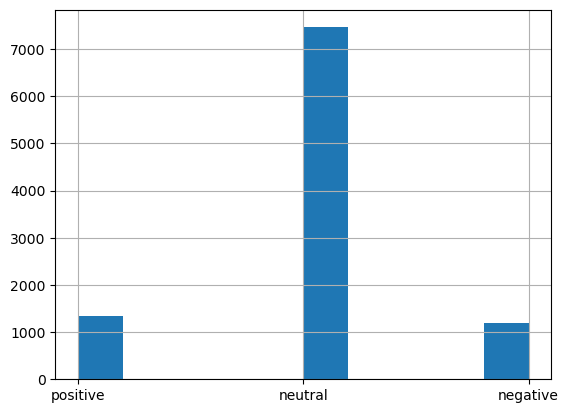

In [31]:
df_title_news_concat['sentiment_label'].hist()

In [32]:
df_title_news_concat.groupby(['sentiment_label']).agg({'sentiment_label': ['count']})

,sentiment_label
,count
sentiment_label,
negative,1186
neutral,7462
positive,1352


In [33]:
le = LabelEncoder()
df_title_news_concat['sentiment_label'] = le.fit_transform(df_title_news_concat['sentiment_label'].astype(str))

In [34]:
df_title_news_concat.head()

,title,sentiment_label
0,Ястржембский называет имя арестованного за взр...,2
1,"Чемпионат Италии: ""Ювентус"" ушел в отрыв",2
2,Из Чернокозово отпущены первые амнистированные...,1
3,Парламент Украины затребовал у Конгресса США п...,0
4,Пилот Формулы-1 уцелел в авиакатастрофе,2


In [35]:
df_title_news_concat = shuffle(df_title_news_concat)

In [36]:
labeled_title, unlabeled_title = train_test_split(df_title_news_concat, train_size=0.2, random_state=42)

In [37]:
labeled_title.head()

,title,sentiment_label
4890,Игорь Иванов провел отдельную встречу с Мадлен...,1
1111,Лужков обещает кризис,0
6873,Комиссия ЕС закрыла изолятор в Червленой,0
9099,Из главной тюрьмы Соломоновых островов сбежали...,1
7316,300 тысячам россиян придется прийти в налогову...,1


In [38]:
unlabeled_title.head()

,title,sentiment_label
6537,Леннокс Льюис теряет титул без боя,2
353,День рождения Лужкова: поздравление от Ельцина...,2
3909,Новое правительство Австрии приведено к присяге,1
7258,Организаторы нападения на Подмосковный ОМОН об...,0
9403,На Уимблдоне стартуют десять россиян,1


In [39]:
def train_model(labeled_title):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(labeled_title['title'])
    y = labeled_title['sentiment_label']

    model = LogisticRegression()
    model.fit(X, y)

    return model, vectorizer

In [40]:
model, vectorizer = train_model(labeled_title)

In [41]:
X_unlabeled = vectorizer.transform(unlabeled_title['title'])
y_unlabeled_predicted = model.predict(X_unlabeled)

In [42]:
y_unlabeled_proba = model.predict_proba(X_unlabeled)
uncertainty = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [43]:
labeled_title_new = unlabeled_title.iloc[uncertainty.argsort()[:100]]
unlabeled_title_new = unlabeled_title.iloc[uncertainty.argsort()[100:]]

In [44]:
labeled_title_new

,title,sentiment_label
7123,"""Газпром"" потребует от ""Медиа-Моста"" 211 милли...",1
6992,Подросток стрелял по людям из пневматического ...,1
4283,Минфин выплатит 101 тысячу долларов по иску ЗА...,1
4081,Правительство вкладывает 70 миллионов долларов...,1
2835,Суд обязал Минфин РФ выплатить 53 миллиона дол...,1
...,...,...
5047,Правительство распорядилось обеспечить Чечню и...,1
261,МВД создает службу по борьбе с мафией,1
2061,Россия выплачивает долги Парижскому клубу по г...,1
7290,"Суд по ""делу Локерби"": ливийцы невиновны?",1


In [45]:
labeled_title = pd.concat([labeled_title, labeled_title_new])

In [46]:
labeled_title.shape

(2100, 2)

In [47]:
unlabeled_title_new.shape

(7900, 2)

In [48]:
model, vectorizer = train_model(labeled_title)

In [49]:
title_test = pd.read_csv('./csv/test.csv', engine='python', on_bad_lines='skip')

In [50]:
title_test['sentiment_label'] = le.fit_transform(title_test['sentiment_label'].astype(str))

In [51]:
title_test.head()

,title,sentiment_label
0,Вагоны московского метро будут складываться га...,1
1,В Чечню пытались проникнуть наемники из Пакистана,1
2,Таллинские заключенные предпочитают голод духоте,0
3,"Адвокатам ""Моста"" не удалось дать отвод следов...",1
4,В поезде Донецк-Москва нашли взрывчатку,1


In [52]:
X_test = vectorizer.transform(title_test['title'])
y_test_predicted = model.predict(X_test)
f1 = f1_score(title_test['sentiment_label'], y_test_predicted, average='micro')

print(f1)

0.84192


Вывод:

Выполнил разметку на основе правил, произвел разметку вручную другого подмножества. Объединил эти две выборки в один дасет и произвел обучение модели. Эффективность обученной модели составила 84%.